In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
#import datetime as dt

/Users/melissa/anaconda3/envs/pydata/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/melissa/anaconda3/envs/pydata/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/melissa/anaconda3/envs/pydata/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/melissa/anaconda3/envs/pydata/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/melissa/anaconda3/envs/pydata/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/melissa/anaconda3/e

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc
from sqlalchemy.sql import label

In [4]:
# Database setup
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurements', 'stations']

In [7]:
# Save reference to the tables
Measurement = Base.classes.measurements
Stations = Base.classes.stations

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

In [9]:
# Use a session query to find the first row in the database
data = session.query(Measurement).first()
data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1153efb38>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': '0.08',
 'station': 'USC00519397',
 'tobs': '65'}

In [10]:
# Precipitation Analysis
results_date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2017-04-01', Measurement.date < '2018-04-20').order_by(Measurement.date).group_by(Measurement.date).all()    

In [11]:
print(results_date_prcp)

[('2017-04-02', '0.0'), ('2017-04-03', '0.23'), ('2017-04-04', '0.02'), ('2017-04-05', '0.45'), ('2017-04-06', '0.0'), ('2017-04-07', '0.0'), ('2017-04-08', '0.0'), ('2017-04-09', '0.0'), ('2017-04-10', '0.0'), ('2017-04-11', '0.25'), ('2017-04-12', '0.65'), ('2017-04-13', '0.23'), ('2017-04-14', '2.82'), ('2017-04-15', '0.9'), ('2017-04-16', '0.11'), ('2017-04-17', '1.3'), ('2017-04-18', '0.98'), ('2017-04-19', '0.14'), ('2017-04-20', '0.0'), ('2017-04-21', '1.84'), ('2017-04-22', '1.35'), ('2017-04-23', '0.35'), ('2017-04-24', '0.05'), ('2017-04-25', '0.0'), ('2017-04-26', '0.22'), ('2017-04-27', '0.11'), ('2017-04-28', '0.79'), ('2017-04-29', '0.0'), ('2017-04-30', '0.8'), ('2017-05-01', '0.25'), ('2017-05-02', '0.0'), ('2017-05-03', '0.01'), ('2017-05-04', '0.0'), ('2017-05-05', '0.1'), ('2017-05-06', '0.0'), ('2017-05-07', '0.03'), ('2017-05-08', '1.11'), ('2017-05-09', '0.23'), ('2017-05-10', '0.55'), ('2017-05-11', '0.44'), ('2017-05-12', '0.1'), ('2017-05-13', '0.1'), ('2017-05

In [12]:
surfsup_date = [str(result[0]) for result in results_date_prcp[:50]]
surfsup_prcp = [float(result[1]) for result in results_date_prcp[:50]]

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from datetime import datetime

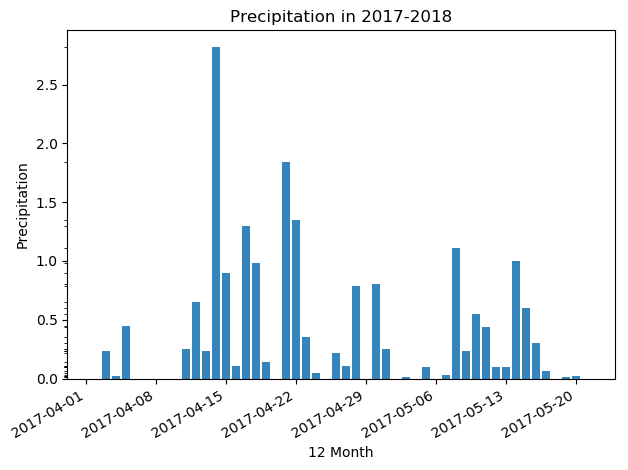

In [21]:
# Plot the Precipitation Bar Chart 
datetime_surfsup_date = [datetime.strptime(date, '%Y-%m-%d') for date in surfsup_date]

fig, ax=plt.subplots()
x_axis = datetime_surfsup_date
y_axis = surfsup_prcp
ax.set_xlabel("12 Month")
ax.set_ylabel("Precipitation")
ax.set_yticks(y_axis, range(0,3))
#ax.set_ylim(ymin=0, ymax=3)
ax.set_title("Precipitation in 2017-2018")

plt.bar(x_axis, y_axis, align='center',alpha=0.9)
plt.xticks(rotation = '45')
plt.gcf().autofmt_xdate()
fig.tight_layout()
plt.show()

In [15]:
# Station Analysis
# Number of stations
session.query(func.count(Stations.station)).all()

[(9)]

In [16]:
# Most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [17]:
# Station with the highest no. of observations
active_stations[:1]

[('USC00519281', 2772)]

In [23]:
# Plot Tobs for station with highest no. of obs for the past 12 mos.
import datetime as datetime
tobs_last_yr_dt = datetime.date.today() - datetime.timedelta(days = 365)

tobs_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > tobs_last_yr_dt).all()
    
tobs_df = pd.DataFrame(tobs_data, columns = ['Tobs'])
tobs_df.plot.hist(bins = 12)
plt.tight_layout()
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot